## Mars Body-fixed frame and representation conversions

This tutorial describes how to subclass and define with astropy, a custom coordinate frame for Mars which can be described by a geodetic or bodycentric representation, then how to switch from one representation to another.

Note that these features are available in astropy starting from version 6.0

### Define some Mars representations

In [1]:
import astropy.units as u
from astropy.coordinates.representation import (
    BaseBodycentricRepresentation,
    BaseGeodeticRepresentation,
)

First of all let us create a new class to represent Mars, and make it a subclass of BaseGeodeticRepresentation.
Geodetic latitudes are used and longitudes span from 0 to 360 degrees east positive
This is a representation of the Mars spheroid as defined in [doi:10.1007/BF01229508](https://ui.adsabs.harvard.edu/link_gateway/1980CeMec..22..205D/doi:10.1007/BF01229508) in 1979:

In [2]:
class IAUMARS1979GeodeticRepresentation(BaseGeodeticRepresentation):

    _equatorial_radius = 3393400.0 * u.m
    _flattening = 0.518650 * u.percent

The current standard for Mars has been defined in [doi:10.1023/A:1013939327465](https://ui.adsabs.harvard.edu/link_gateway/2002CeMDA..82...83S/doi:10.1023/A:1013939327465) and it corresponds to a planetocentric representation.

In [3]:
class IAUMARS2000BodycentricRepresentation(BaseBodycentricRepresentation):

    _equatorial_radius = 3396190.0 * u.m
    _flattening = 0.5886008 * u.percent

### Define a Mars body-fixed reference frame

The new planetary body-fixed reference system will be described using the previous defined representations.

In [4]:
from astropy.coordinates.baseframe import BaseCoordinateFrame

class MarsCoordinateFrame(BaseCoordinateFrame):
    """
    A reference system for Mars.
    """

    name = "Mars"

The comparison between the two representation is possible in the same coordinate frame as the origins of the two Mars description are the same: the Airy-0 crater inside the larger Airy Crater on Mars.

In [5]:
import numpy as np

mars1979 = MarsCoordinateFrame(
    lon=np.linspace(0, 360, 128) * u.deg,
    lat=np.linspace(-90, 90, 128) * u.deg,
    representation_type=IAUMARS1979GeodeticRepresentation,
)
mars2000 = mars1979.represent_as(IAUMARS2000BodycentricRepresentation)

In [6]:
import matplotlib.pyplot as plt

from astropy.visualization import astropy_mpl_style, quantity_support

plt.style.use(astropy_mpl_style)
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7f3593bc87d0>

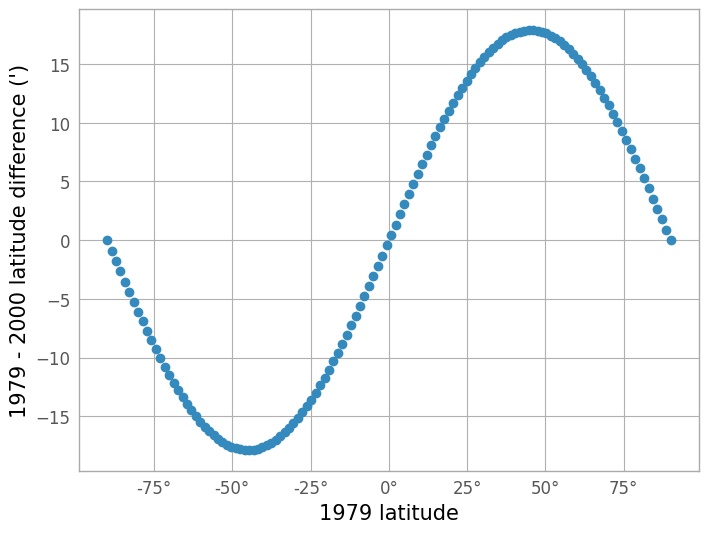

In [7]:
fig, ax = plt.subplots()
ax.scatter(mars1979.lat, (mars1979.lat - mars2000.lat) << u.arcmin)

ax.set_ylabel("1979 - 2000 latitude difference (')", fontsize=15)
ax.set_xlabel('1979 latitude', fontsize=15)

plt.show()